# import

In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

In [56]:
import numpy as np
import pandas as pd
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt   
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Read Data

In [3]:
data = pd.read_csv('Wine_data.csv')

In [4]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
1,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
2,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
3,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
4,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
5,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
6,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.600000,6
7,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
8,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
9,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,11.000000,6


In [5]:
data.shape

(4898, 12)

In [6]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
# Convert the 'quality' column as categorical column
data['quality'] = data.quality.astype('category')
data.dtypes

fixed acidity            float64
volatile acidity         float64
citric acid              float64
residual sugar           float64
chlorides                float64
free sulfur dioxide      float64
total sulfur dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                 category
dtype: object

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


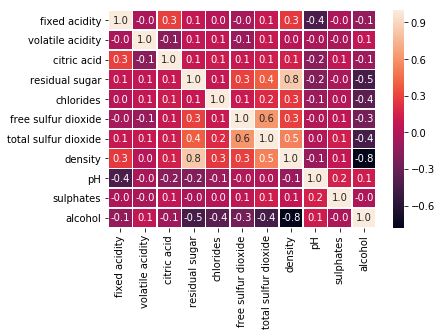

In [9]:
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f')

In [10]:
# ****** To be predicted *******
# Create a separate dataframe consisting only of the features i.e independent attributes
data_feature_df = data.drop(labels= "quality" , axis = 1)

In [11]:
data_feature_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000
1,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000
2,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000
3,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000
4,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000
5,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000
6,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.600000
7,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000
8,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000
9,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,11.000000


# Scaling the data

In [12]:
data_feature_df_z = data_feature_df.apply(zscore) 

In [13]:
data_feature_df_z

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
5,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667
6,-0.776015,0.414339,-1.439511,0.120000,-0.035355,-0.312141,-0.055553,0.291789,-0.054751,-0.173921,-0.743008
7,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152
8,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276
9,1.475751,-0.577879,0.791757,-0.964483,-0.081131,-0.429751,-0.220283,-0.076030,0.210175,-0.349184,0.394746


In [14]:
# to be predicted
data_labels = data["quality"]

In [15]:
data_labels

0       6
1       6
2       6
3       6
4       6
5       6
6       6
7       6
8       6
9       6
10      5
11      5
12      5
13      7
14      5
15      7
16      6
17      8
18      6
19      5
20      8
21      7
22      8
23      5
24      6
25      6
26      6
27      6
28      6
29      7
       ..
4868    6
4869    6
4870    7
4871    6
4872    5
4873    6
4874    6
4875    6
4876    7
4877    5
4878    4
4879    6
4880    6
4881    6
4882    5
4883    6
4884    5
4885    6
4886    7
4887    7
4888    5
4889    6
4890    6
4891    6
4892    5
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: category
Categories (7, int64): [3, 4, 5, 6, 7, 8, 9]

In [16]:
data.groupby(["quality"]).count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,20,20,20,20,20,20,20,20,20,20,20
4,163,163,163,163,163,163,163,163,163,163,163
5,1457,1457,1457,1457,1457,1457,1457,1457,1457,1457,1457
6,2198,2198,2198,2198,2198,2198,2198,2198,2198,2198,2198
7,880,880,880,880,880,880,880,880,880,880,880
8,175,175,175,175,175,175,175,175,175,175,175
9,5,5,5,5,5,5,5,5,5,5,5


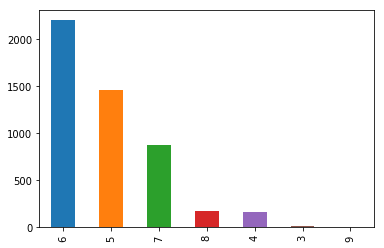

In [17]:
data.quality.value_counts().plot(kind='bar') #graphical Repr.

In [18]:
# store the normalized features data into np array 
X = np.array(data_feature_df_z)
Y = np.array(data_labels)

In [19]:
X

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01, ...,
        -1.24692128e+00, -3.49184257e-01, -1.39315246e+00],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02, ...,
         7.40028640e-01,  1.34184656e-03, -8.24275678e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01, ...,
         4.75101984e-01, -4.36815783e-01, -3.36667007e-01],
       ...,
       [-4.20473102e-01, -3.79435433e-01, -1.19159198e+00, ...,
        -1.31315295e+00, -2.61552731e-01, -9.05543789e-01],
       [-1.60561323e+00,  1.16673788e-01, -2.82557040e-01, ...,
         1.00495530e+00, -9.62604939e-01,  1.85757201e+00],
       [-1.01304317e+00, -6.77100966e-01,  3.78559282e-01, ...,
         4.75101984e-01, -1.48839409e+00,  1.04489089e+00]])

In [20]:
Y

array([6, 6, 6, ..., 6, 7, 6], dtype=int64)

# Split to Train and Test

In [21]:
# Break the data into training and test set

X_Train = X[ :3430, :]
X_Test = X[3431: , :]
Y_Train = Y[:3430, ]
Y_Test = Y[3431:, ]

In [22]:
X_Train.shape, Y_Train.shape, X_Test.shape, Y_Test.shape

((3430, 11), (3430,), (1467, 11), (1467,))

# Decission Tree Classifier - CART

In [23]:
DTClassifier = DecisionTreeClassifier (max_depth=1, min_samples_split = 3, random_state = 0)
DTClassifier.fit (X_Train,Y_Train)
predicted_labels = DTClassifier.predict(X_Test)
accuracyscore = accuracy_score(Y_Test, predicted_labels)
print(accuracyscore)

0.49829584185412407


In [24]:
DTClassifier.fit (X_Train,Y_Train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [25]:
DTClassifier = DecisionTreeClassifier (max_depth=6, min_samples_split = 15, random_state = 0)
DTClassifier.fit (X_Train,Y_Train)
predicted_labels = DTClassifier.predict(X_Test)
accuracyscore = accuracy_score(Y_Test, predicted_labels)
print(accuracyscore)

0.5351056578050443


# To improve the performance

In [26]:
# Call Decision Tree Classifier algorithm again and predict
DTClassifier_new = DecisionTreeClassifier (max_depth=3, random_state = 0)
DTClassifier_new.fit(X_Train, Y_Train)
predicted_labels = DTClassifier_new.predict(X_Test)
accuracy_score_new = accuracy_score(Y_Test, predicted_labels)
print(accuracy_score_new)

0.5303340149965917


In [27]:
DTClassifier_new = DecisionTreeClassifier (max_depth=5, random_state = 0)
DTClassifier_new.fit(X_Train, Y_Train)
predicted_labels = DTClassifier_new.predict(X_Test)
accuracy_score_new = accuracy_score(Y_Test, predicted_labels)
print(accuracy_score_new)

0.5296523517382413


In [28]:
#lets see what happens we change the max_depth to 3 but the criterion is entropy?

DTClassifier_new = DecisionTreeClassifier (max_depth=3, criterion = "entropy",min_samples_leaf= 5,random_state = 0)
DTClassifier_new.fit(X_Train, Y_Train)
predicted_labels = DTClassifier_new.predict(X_Test)
accuracy_score_new = accuracy_score(Y_Test, predicted_labels)
print(accuracy_score_new)


0.5439672801635992


In [29]:
DTClassifier_new = DecisionTreeClassifier (max_depth=2, criterion = "entropy",min_samples_leaf= 5,random_state = 0)
DTClassifier_new.fit(X_Train, Y_Train)
predicted_labels = DTClassifier_new.predict(X_Test)
accuracy_score_new = accuracy_score(Y_Test, predicted_labels)
print(accuracy_score_new)


0.578050443081118


In [30]:
DTClassifier_new = DecisionTreeClassifier (max_depth=5, criterion = "entropy",min_samples_leaf= 5,random_state = 0)
DTClassifier_new.fit(X_Train, Y_Train)
predicted_labels = DTClassifier_new.predict(X_Test)
accuracy_score_new = accuracy_score(Y_Test, predicted_labels)
print(accuracy_score_new)


0.512610770279482


In [31]:
#Let's look at what happens when min_samples_leaf =5 with gini
DTClassifier_new = DecisionTreeClassifier (max_depth=7, criterion = "gini",min_samples_leaf= 5,random_state = 0)
DTClassifier_new.fit(X_Train, Y_Train)
predicted_labels = DTClassifier_new.predict(X_Test)
accuracy_score_new = accuracy_score(Y_Test, predicted_labels)
print(accuracy_score_new)

0.5160190865712339


# using entropy with max_depth =2 and min_samples_leaf = 5 we got the highest accuracy i.e. 57.8%

In [32]:
DTClassifier_new = DecisionTreeClassifier (max_depth=2, criterion = "entropy",min_samples_leaf= 5,random_state = 0)
DTClassifier_new.fit(X_Train, Y_Train)
predicted_labels = DTClassifier_new.predict(X_Test)
accuracy_score_new = accuracy_score(Y_Test, predicted_labels)
print(accuracy_score_new)


0.578050443081118


In [33]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(Y_Test,predicted_labels))
print(classification_report(Y_Test,predicted_labels))

[[  0   0   2   0   0   0]
 [  0   0  16  21   0   0]
 [  0   0 249 144   0   0]
 [  0   0 132 599   0   0]
 [  0   0  12 250   0   0]
 [  0   0   0  42   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        37
           5       0.61      0.63      0.62       393
           6       0.57      0.82      0.67       731
           7       0.00      0.00      0.00       262
           8       0.00      0.00      0.00        42

   micro avg       0.58      0.58      0.58      1467
   macro avg       0.20      0.24      0.21      1467
weighted avg       0.44      0.58      0.50      1467



C:\Users\ASHISH\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ASHISH\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ASHISH\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# KNN 

In [37]:
def getAccuracy(Y_Test,predicted_labels):
	correct = 0
	for x in range(len(Y_Test)):
		if Y_Test[x][-1] is predicted_labels[x]:
			correct += 1
	return (correct/float(len(Y_Test))) * 100.0

In [40]:
NNH = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')


In [41]:
NNH.fit(X_Train, Y_Train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=21, p=2,
           weights='uniform')

In [42]:
predicted_labels = NNH.predict(X_Test)

In [43]:
predicted_labels

array([6, 7, 7, ..., 6, 7, 6], dtype=int64)

# Accuracy score for KNN

In [93]:
#we take n_neigbour as 21 and getting 64.6% accuracy
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors=21)
NNH.fit(X, Y)
predicted_labels = NNH.predict(X_Test)
print(predicted_labels)
accuracy_score_new = accuracy_score(Y_Test, predicted_labels)
print(accuracy_score_new)

[6 6 6 ... 6 7 6]
0.6462167689161554


In [88]:
#we take n_neigbour as 10 and getting 69.9% accuracy
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors=10)
NNH.fit(X, Y)
predicted_labels = NNH.predict(X_Test)
print(predicted_labels)
accuracy_score_new = accuracy_score(Y_Test, predicted_labels)
print(accuracy_score_new)

[6 6 7 ... 5 7 6]
0.6993865030674846


In [89]:
#we take n_neigbour as 2 and getting 88.4% accuracy
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors=2)
NNH.fit(X, Y)
predicted_labels = NNH.predict(X_Test)
print(predicted_labels)
accuracy_score_new = accuracy_score(Y_Test, predicted_labels)
print(accuracy_score_new)

[6 5 7 ... 5 7 6]
0.8841172460804363


In [94]:
#we take n_neigbour as 5 and getting 75.9% accuracy
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors=5)
NNH.fit(X, Y)
predicted_labels = NNH.predict(X_Test)
print(predicted_labels)
accuracy_score_new = accuracy_score(Y_Test, predicted_labels)
print(accuracy_score_new)

[6 6 7 ... 5 7 6]
0.7593728698023177


# NAIVE BAYES

# using Gaussian NB

In [68]:
#using Gaussian NB
model = GaussianNB()
model.fit(X_Train, Y_Train)
expected = Y_Test
predicted = model.predict(X_Test)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           3       0.07      0.50      0.12         2
           4       0.43      0.32      0.37        37
           5       0.51      0.52      0.52       393
           6       0.54      0.23      0.32       731
           7       0.30      0.77      0.43       262
           8       0.25      0.17      0.20        42

   micro avg       0.41      0.41      0.41      1467
   macro avg       0.35      0.42      0.33      1467
weighted avg       0.48      0.41      0.39      1467

[[  1   0   0   1   0   0]
 [  1  12   9   5   9   1]
 [  6   6 206 113  60   2]
 [  4   9 153 167 388  10]
 [  1   1  26  23 203   8]
 [  2   0   8   2  23   7]]


# Accuracy score for Naive Bayes

In [67]:
accuracy_score_new = accuracy_score(Y_Test, predicted)
print(accuracy_score_new)

0.40627130197682343


In [110]:
#What can you comment on the variables?
#We comment that KNN gives the highest accuracy comparing to CART and Naive Bayes

In [96]:
#Do we need to do outlier treatment? What is the most apt method for this?

C:\Users\ASHISH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


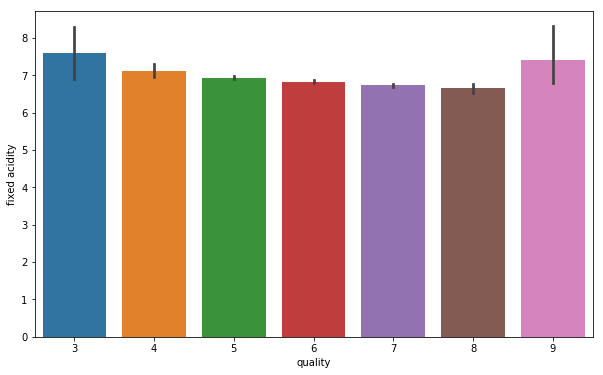

In [103]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = data)

C:\Users\ASHISH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


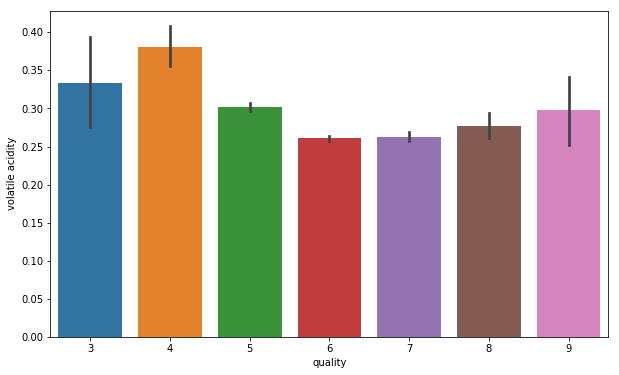

In [115]:
#we observe here that its quite the trend gets decreasing  in the volatile acidity as we give high quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = data)

C:\Users\ASHISH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


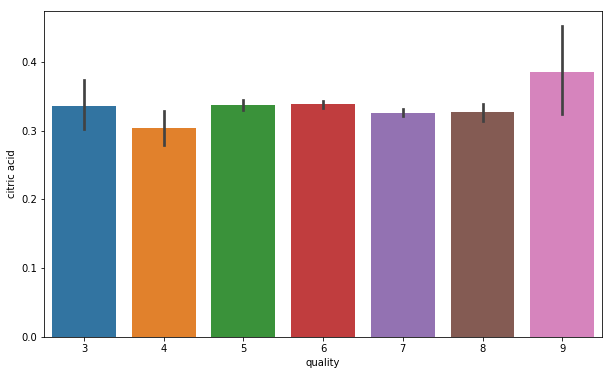

In [105]:
#Mix of citric acid go high as high in quality of  wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = data)

C:\Users\ASHISH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


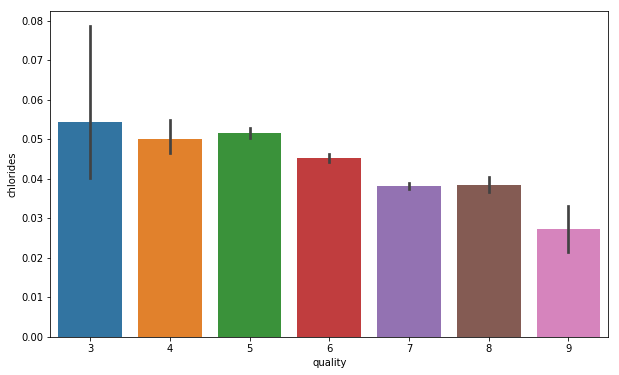

In [106]:
#Mic of chloride also gets decrease as we increase the quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = data)

C:\Users\ASHISH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


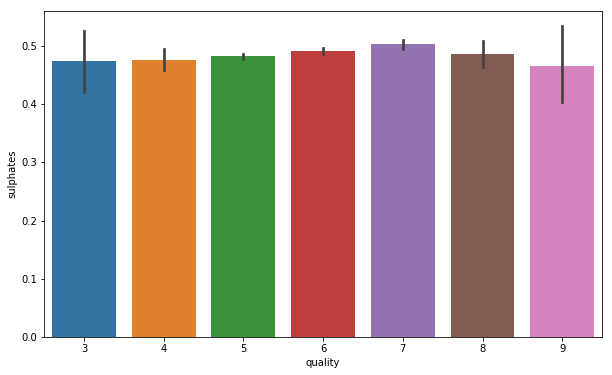

In [107]:
#Sulphates level gets increase in quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = data)

C:\Users\ASHISH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


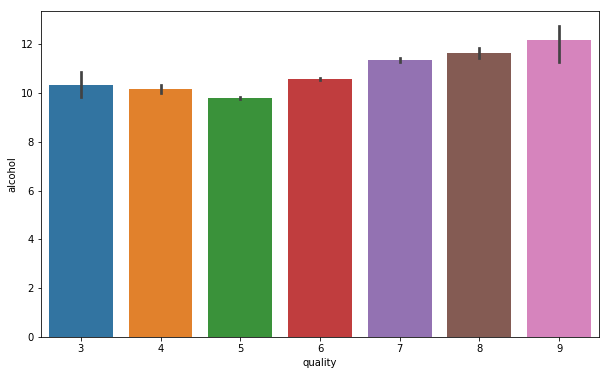

In [108]:
#Alcohol level also gets increasing because the wine quality increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = data)

In [111]:
#Does it make a business case to predict the quality of the wine?
#yes, it make a business case to predict the wine quality

In [112]:
#Are we able to classify the type of wine given the predictors?
#yes,we can classify

In [113]:
#Which among the below methods will be your recommendation? Does this make business sense? how will this help in the real world?
#I recommend to follow the NAive Bayes  method beacause its presenting outliers